In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv') #Three stocks (R,X_s,X_b) Without predictors

In [3]:
#Initialize Neural Network and set-up the placeholders
tf.reset_default_graph()
NN_input = tf.placeholder(shape=[1,2],dtype=tf.float32)
NN_weights = tf.Variable(tf.random_uniform([2,10],0,0.01))
Q_FA = tf.matmul(NN_input,NN_weights)
A_Max = tf.argmax(Q_FA,1)

# Calculate loss for the NN from the Q values
Q_Next = tf.placeholder(shape=[1,10],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(Q_Next - Q_FA))
trainer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
updateModel = trainer.minimize(loss)

#Define Action Matrix (Now discrete case) 
A = np.linspace(0,1,10) # portfolio weights of stocks (1-weight) is the weight in the bonds

241
Writing away results
242
Writing away results
243
Writing away results
244
Writing away results
245
Writing away results
246
Writing away results
247
Writing away results
248
Writing away results
249
Writing away results
250
Writing away results
251
Writing away results
252
Writing away results
253
Writing away results
254
Writing away results
255
Writing away results
256
Writing away results
257
Writing away results
258
Writing away results
259
Writing away results
260
Writing away results
261
Writing away results
262
Writing away results
263
Writing away results
264
Writing away results
265
Writing away results
266
Writing away results
267
Writing away results
268
Writing away results
269
Writing away results
270
Writing away results
271
Writing away results
272
Writing away results
273
Writing away results
274
Writing away results
275
Writing away results
276
Writing away results
277
Writing away results
278
Writing away results
279
Writing away results
280
Writing away results


Writing away results
570
Writing away results
571
Writing away results
572
Writing away results
573
Writing away results
574
Writing away results
575
Writing away results
576
Writing away results
577
Writing away results
578
Writing away results
579
Writing away results
580
Writing away results
581
Writing away results
582
Writing away results
583
Writing away results
584
Writing away results
585
Writing away results
586
Writing away results
587
Writing away results
588
Writing away results
589
Writing away results
590
Writing away results
591
Writing away results
592
Writing away results
593
Writing away results
594
Writing away results
595
Writing away results
596
Writing away results
597
Writing away results
598
Writing away results
599
Writing away results
600
Writing away results
601
Writing away results
602
Writing away results
603
Writing away results
604
Writing away results
605
Writing away results
606
Writing away results
607
Writing away results
608
Writing away results
609


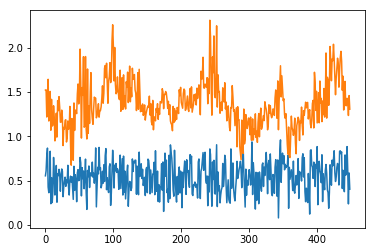

In [4]:
# initialize
init = tf.global_variables_initializer()
gamma = 1 
epsilon = 0.1
train_data = 241 # also an expanding window
jList = []
TWlistTrain = []
TWlist = []
Index = []
MWeights = []
# data parsing
dates = data['Date']
mdata = data[['r','xs','xb']]
mdata.index = pd.DatetimeIndex(dates)
n = data.size/4-4
periods = 60
epochs = 20

with tf.Session() as sess:
    for i in range(241,int(n-periods-1)):
        OptimalWeights = np.zeros(periods-1)
        sess.run(init) # initialize the Neural Network again
        print(i)
        
        currentEpoch = 0
        while currentEpoch < epochs:
            #Training of the Q-Network for the data available (with Neural Nets) 
            for j in range(0,i):
                s = mdata.iloc[j,1:4].values.reshape(1,2)
                #Choose an action by greedily (with e chance of random action) from the Q-network
                a_int,allQ = sess.run([A_Max,Q_FA],feed_dict={NN_input:s})
                a = A[a_int-1]  # -1 because the output neurons are labeled 1 till 101 and it will be an index
                if np.random.rand(1) < epsilon:
                    a = random.choice(A)

                #Get new state and reward from environment
                s1 = data.iloc[j+1,2:4].values.reshape(1,2)
                r = (a*s1[0][0] + (1-a)*s1[0][1]) #reward: this is now the wealth gained from this step, but could be other rewards like utility
                Q = sess.run(Q_FA,feed_dict={NN_input:s1})

                #Obtain maxQ' and set our target value for chosen action.
                Q1 = np.max(Q)
                targetQ = allQ
                targetQ[0,a_int] = r + gamma*Q1

                #Train the neural network using target and predicted Q values
                _,W1 = sess.run([updateModel,NN_input],feed_dict={NN_input:s,Q_Next:targetQ})
                s = s1
                if currentEpoch  > 5:
                    # decrease amount of random actions over time in order to improve exploitation rather than exploration
                    # only increase exploitation when a good action has been found (otherwise one exploits a bad solution)
                    e = 1./((i/50) + 10)
                    break
            currentEpoch += 1
            
            for k in range(0,periods-1):
                # After training now calculate the optimal weights for the K=60 periods to come
                s = mdata.iloc[i+k,1:4].values.reshape(1,2)
                a_int,allQ = sess.run([A_Max,Q_FA],feed_dict={NN_input:s})
                aOpt = A[a_int-1]
                OptimalWeights[k] = aOpt
        
        # For insight purposes
        MWeights.append(np.mean(OptimalWeights))
        TWlist.append(np.exp(sum(OptimalWeights*mdata[i+1:i+periods]['xs'] + (1-OptimalWeights)*mdata[i+1:i+periods]['xb'])))
        Index.append(i)
        
        print('Writing away results')
        df = pd.DataFrame({'index date':Index,'TW':TWlist, 'Mean Weights Xs':MWeights})
        df.to_excel('Results_NNO_g10_e20.xlsx', sheet_name='sheet1', index=False)
    # close session
plt.plot(MWeights)
plt.plot(TWlist)
        